<a id = '4.0'></a>
<p style = "font-size : 35px; color : #34656d ;  text-align : center; background-color : #08f9f9; border-radius: 5px 5px;"><strong>Regularization(Ridge, Lasso, ElasticNet) - Cross Validation - Gridsearch</strong></p> 

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

## <span style='color:red'> Polinomial Regression</span> 

In [20]:
df = pd.read_csv("Advertising.csv")

In [21]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [22]:
df.shape

(200, 4)

In [23]:
X = df.drop("sales", axis =1)
y = df["sales"]

### Polynomial Conversion

In [24]:
from sklearn.preprocessing import PolynomialFeatures    #Önce feature'lari olustutturuyoruz.

We create an artificial overfiting situation by taking poly feature from 5 degrees

In [25]:
polynomial_converter = PolynomialFeatures(degree=5, include_bias=False)   #Derecemizi belirliyoruz.

poly_features = polynomial_converter.fit_transform(X)     # Bu feature'lara göre datamizi transform ediyoruz.Yani dereceye bagli olarak yeni feature'lar cikartiyor.

In [19]:
poly_features.shape    # Görüldügü gibi feature sayisi 55e cikti.Bunlar birbirine bagimli, birbirinin karesi küpü filan.
#yeni poly_features lerimiz bunlar..

(200, 55)

### Train | Test Split

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=60)

## Scaling the Data

scaling : Fitting our data to the same ranges. 

Whether a feature is important or not in ML is expressed with coefficients. The ranges of my features can have different range values for each. If we don't do a scale, features in a large range are weighted more (valid for distance-based models) and our model will return incorrect results. We use scale to prevent this. It also accelerates the work of Gradient descent-based models such as linear, logistic regression.

There is no disadvantage of applying scale to data. data scale If you are confused about whether to apply it or not, you can apply scale directly.

Data leakage: Leakage of information about the data in the test set to the data in the train set

To prevent leakage, only fit operation is applied to X_train. On the other hand, only transform operation is applied to X_test. no fit operation is applied to all data.

Target is never scaled. 

In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # Robustscaler is used when outlier could be present

scaler = StandardScaler() # standardizasyon yapar, Minmax = Normalizasyon yapar, Robust = ?? # Standar icin normal dagilimli data gerek.

In [30]:
scaler.fit(X_train)  # Apply just for X_tarin not for X_test (Kalıp çıkarma) # Data leakage olmamasi icn fit sadece X_train'e uygulanir.

StandardScaler()

In [31]:
X_train_scaled = scaler.transform(X_train) # Apply transform according to fit # X_train'i fit'e göre transfor ediyoruz.
X_train_scaled

array([[-0.13637147, -1.17262449, -0.94377948, ..., -0.37887054,
        -0.30077297, -0.25558939],
       [-0.88465456,  1.49742241,  0.21035917, ..., -0.04603505,
        -0.19698694, -0.22658934],
       [ 1.52597518, -0.56579565,  0.2717962 , ..., -0.34247649,
        -0.26297993, -0.22041309],
       ...,
       [-1.17306716,  0.24330947, -0.45228318, ..., -0.357409  ,
        -0.29418089, -0.25378629],
       [ 0.59942131,  0.56020897,  0.34639832, ..., -0.17672011,
        -0.20110974, -0.21154566],
       [-0.87784166, -0.87595262, -1.31240171, ..., -0.37894227,
        -0.30082622, -0.25562471]])

In [32]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.40434538,  1.23446324,  1.42154649, ...,  1.17150405,
         0.64018764,  0.25636683],
       [ 0.79585981,  1.30863121,  0.38589356, ...,  0.02341413,
        -0.15184948, -0.20617619],
       [-0.56899037, -0.50511277,  0.35517504, ..., -0.33089999,
        -0.2515926 , -0.21039484],
       ...,
       [-0.80403529, -0.77481448, -1.08859536, ..., -0.37884863,
        -0.30080589, -0.25562077],
       [ 0.93098225, -0.36351937, -0.20214666, ..., -0.35980299,
        -0.28925729, -0.24935592],
       [ 1.48282683,  1.79409428,  0.48243748, ...,  0.27178635,
        -0.08394814, -0.19082713]])

### checking std = 1 and mean = 0

this gives us the z-scores. so it's also called z-score scaling

These values show where in the normal distribution they correspond to the z score.


In [33]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round() #Applying aggregation across all the columns, mean and std will be found for each column in the dataframe

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
mean,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [34]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
mean,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0


## Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [37]:
lm.fit(X_train_scaled, y_train) # Modeli calistirdi ögredni bitti = fit

LinearRegression()

In [44]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, name):
    
    scores = {name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [43]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear") # Evaluate the result. Overfitting? # Train R2 ile test R2 arasinda cok büyük fark olsa idi overfitting var derdik. 
ls

,linear_train,linear_test
R2,0.997822,0.994462
mae,0.184884,0.296886
mse,0.056620,0.159737
rmse,0.237950,0.399671


## <span style='color:red'> Multicolineratiy</span> 

If there is a strong correlation between the independent variables, this situation is called **multicolineraty**.
 
**Multicolineraty** prevents my model from detecting important features.

In [47]:
def color_red(val):
    if val > 0.90 and val < 0.99:
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'


In [48]:
pd.DataFrame(poly_features).corr().style.applymap(color_red)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,1.000000,0.054809,0.056648,0.967662,0.662160,0.603099,0.050844,0.046222,0.055626,0.912265,0.721105,0.650492,0.515275,0.466823,0.420083,0.048734,0.039665,0.028958,0.039409,0.855073,0.709761,0.630912,0.584542,0.516807,0.460056,0.437080,0.409771,0.364701,0.315533,0.046959,0.032900,0.017709,0.008777,0.020708,0.801581,0.680833,0.596879,0.588127,0.506564,0.447078,0.505741,0.462847,0.403394,0.346404,0.384146,0.373602,0.343453,0.286909,0.243084,0.045768,0.026080,0.007613,-0.004329,-0.007060,0.004975
1,0.054809,1.000000,0.354104,0.078644,0.681392,0.250204,0.966752,0.708347,0.352336,0.085030,0.548158,0.217652,0.738807,0.549689,0.259887,0.912163,0.738767,0.538912,0.296300,0.084899,0.473991,0.201889,0.615548,0.449913,0.218735,0.725701,0.596713,0.435679,0.221477,0.858447,0.728288,0.578239,0.405678,0.233682,0.082679,0.420642,0.191371,0.539663,0.389348,0.198233,0.616497,0.492912,0.353459,0.181827,0.697530,0.604193,0.480872,0.335472,0.178656,0.809579,0.705871,0.590660,0.441864,0.300963,0.183753
2,0.056648,0.354104,1.000000,0.076442,0.251706,0.710860,0.361405,0.846215,0.939677,0.087403,0.223935,0.586885,0.277229,0.649722,0.744348,0.348591,0.756600,0.848977,0.820403,0.093523,0.216804,0.523625,0.251371,0.545914,0.618126,0.270379,0.595505,0.681096,0.683016,0.329318,0.689047,0.792878,0.765061,0.697417,0.097150,0.214929,0.480870,0.244256,0.490294,0.547514,0.247790,0.509593,0.561287,0.560250,0.253301,0.548691,0.643265,0.634693,0.606379,0.308883,0.629623,0.744772,0.740034,0.661761,0.595177
3,0.967662,0.078644,0.076442,1.000000,0.655610,0.604786,0.074717,0.077064,0.085473,0.984478,0.754241,0.688295,0.515837,0.483686,0.441567,0.069934,0.072344,0.066860,0.071437,0.952132,0.772650,0.694074,0.615256,0.560653,0.504148,0.439513,0.430431,0.395637,0.346060,0.064975,0.064502,0.058043,0.047638,0.050892,0.914302,0.763650,0.675974,0.643078,0.569615,0.506698,0.533678,0.507202,0.453477,0.391984,0.386548,0.394148,0.376481,0.324503,0.277483,0.060771,0.055516,0.048174,0.037872,0.028539,0.031722
4,0.662160,0.681392,0.251706,0.655610,1.000000,0.593723,0.664399,0.485959,0.241570,0.627090,0.965952,0.613323,0.962962,0.777374,0.490596,0.631071,0.502268,0.356248,0.190696,0.594024,0.910381,0.596252,0.951173,0.762204,0.504128,0.905034,0.783817,0.618268,0.392485,0.597633,0.490224,0.372765,0.250397,0.138198,0.561829,0.853111,0.571575,0.906957,0.717061,0.487728,0.905252,0.771478,0.605065,0.401054,0.848834,0.767547,0.645128,0.482578,0.309573,0.567146,0.470411,0.371193,0.262030,0.169913,0.097704
5,0.603099,0.250204,0.710860,0.604786,0.593723,1.000000,0.253924,0.576143,0.663457,0.587286,0.627367,0.969091,0.538715,0.867956,0.937710,0.241838,0.504354,0.558658,0.564313,0.564874,0.627426,0.921108,0.583577,0.860898,0.909793,0.489275,0.786042,0.847498,0.826914,0.224767,0.448703,0.503393,0.481855,0.460299,0.542113,0.617954,0.873051,0.594081,0.826298,0.859458,0.536670,0.794702,0.826686,0.797872,0.443163,0.720646,0.800253,0.764051,0.714386,0.207342,0.399518,0.456294,0.445350,0.396279,0.372849
6,0.050844,0.966752,0.361405,0.074717,0.664399,0.253924,1.000000,0.717856,0.356512,0.081937,0.536793,0.221874,0.768358,0.554347,0.259786,0.985102,0.783297,0.552534,0.297371,0.082618,0.465376,0.206476,0.640765,0.454135,0.219410,0.787473,0.628876,0.439364,0.217841,0.955280,0.798072,0.614792,0.414209,0.232155,0.080961,0.413689,0.196065,0.561681,0.393295,0.199027,0.668950,0.518426,0.355656,0.179322,0.779714,0.658326,0.503108,0.333459,0.172715,0.921100,0.792812,0.646188,0.465716,0.303686,0.180208
7,0.046222,0.708347,0.846215,0.077064,0.485959,0.576143,0.717856,1.000000,0.834543,0.095289,0.411600,0.485136,0.543085,0.756910,0.620568,0.695496,0.977682,0.941437,0.743549,0.107359,0.378923,0.445148,0.471052,0.633268,0.518778,0.539793,0.763229,0.738939,0.573946,0.664420,0.935782,0.944307,0.819946,0.636391,0.116108,0.358969,0.420758,0.435308,0.565920,0.469426,0

## <span style='color:red'> Cross Validation</span> 

We do cross-validation to check whether the one-time scores we receive are consistent or not

cross validation is only applied to the train set.

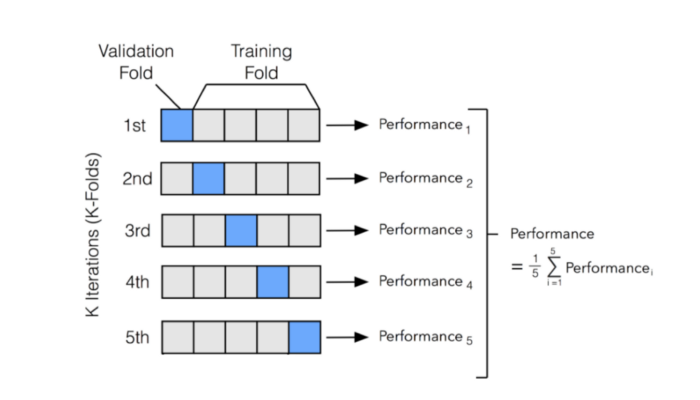

In [49]:
from sklearn.metrics import SCORERS
# list(SCORERS.keys())

In [50]:
from sklearn.model_selection import cross_validate

In [51]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 5)
#kfold da burada bizim k=5 oldu..

In [52]:
scores

{'fit_time': array([0.0149591 , 0.00199437, 0.00498629, 0.00198698, 0.00199556]),
 'score_time': array([0.00299883, 0.00299287, 0.00199652, 0.00099659, 0.00199556]),
 'test_r2': array([0.44676528, 0.98673268, 0.01826704, 0.948967  , 0.99469481]),
 'test_neg_mean_absolute_error': array([-1.04590806, -0.45062915, -1.56103788, -0.69031344, -0.26844249]),
 'test_neg_mean_squared_error': array([ -8.63657972,  -0.45993522, -33.11990098,  -1.12770101,
         -0.12008864]),
 'test_neg_root_mean_squared_error': array([-2.93880583, -0.67818524, -5.75498923, -1.06193268, -0.34653808])}

In [53]:
pd.DataFrame(scores, index = range(1,6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.014959,0.002999,0.446765,-1.045908,-8.636580,-2.938806
2,0.001994,0.002993,0.986733,-0.450629,-0.459935,-0.678185
3,0.004986,0.001997,0.018267,-1.561038,-33.119901,-5.754989
4,0.001987,0.000997,0.948967,-0.690313,-1.127701,-1.061933
5,0.001996,0.001996,0.994695,-0.268442,-0.120089,-0.346538


In [55]:
scores = pd.DataFrame(scores, index=range(1,6))
scores.iloc[:, 2:].mean()
# Burada 5 fold'un r2'sinin ortalama degerini aldik, modelimizin r2'si olarak kabul ettik = 0,679085
# Burada diger degerleri negatif olarak sectik ki r2 yükseltmeye calisirken bunlar da düssün diye..
# Ama sadece isareti negativ. Yoksa bakarken biz bunlara pozitif imis gibi bakiyoruz.

test_r2                             0.679085
test_neg_mean_absolute_error       -0.803266
test_neg_mean_squared_error        -8.692841
test_neg_root_mean_squared_error   -2.156090
dtype: float64

In [56]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear") # cross-validation'li r2 daha dogru. Performans = 0.67

,linear_train,linear_test
R2,0.997822,0.994462
mae,0.184884,0.296886
mse,0.056620,0.159737
rmse,0.237950,0.399671


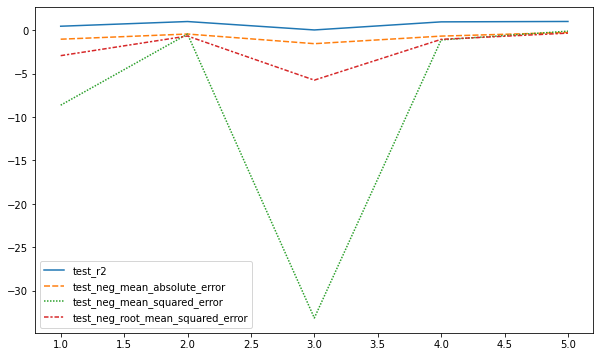

In [57]:
sns.lineplot(data = scores.iloc[:,2:]);

In [74]:
lm.coef_

array([  16.41150074,   -5.71097866,   -0.70927281,  -63.84981287,
         17.22508557,  -10.36823128,   22.80289964,    9.63712793,
          7.1371047 ,  119.78097413,  -25.86339556,   30.0259175 ,
        -18.63807775,  -11.55450135,   14.06686361,  -33.89940429,
        -19.0302691 ,  -14.21067325,  -18.62138892, -105.97183858,
         29.45982893,  -38.657324  ,   -2.4285184 ,   34.72085483,
        -34.84982405,   19.16130168,    5.20416239,  -14.97065363,
         15.16254305,   25.35951043,   13.94680694,    9.79948656,
         28.73869812,    5.88430717,   35.35075143,  -13.87839458,
         18.7770258 ,   11.7286585 ,  -24.03012858,   17.91533998,
        -14.62308653,    3.73825391,    2.30780753,    2.28334927,
          3.62817239,   -8.47622691,    6.3417448 ,    1.00973936,
        -10.1338936 ,  -10.73763884,   -1.03681956,   -2.39430479,
         -9.60088835,  -10.49354438,    3.18865787])

In [75]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
# lm_df

## <span style='color:red'> Ridge Regression</span> 

Ridge and lasso and elastic-net regression are a model tuning method that is used to analyse any data that suffers from multicollinearity, underfiting and overfiting. 

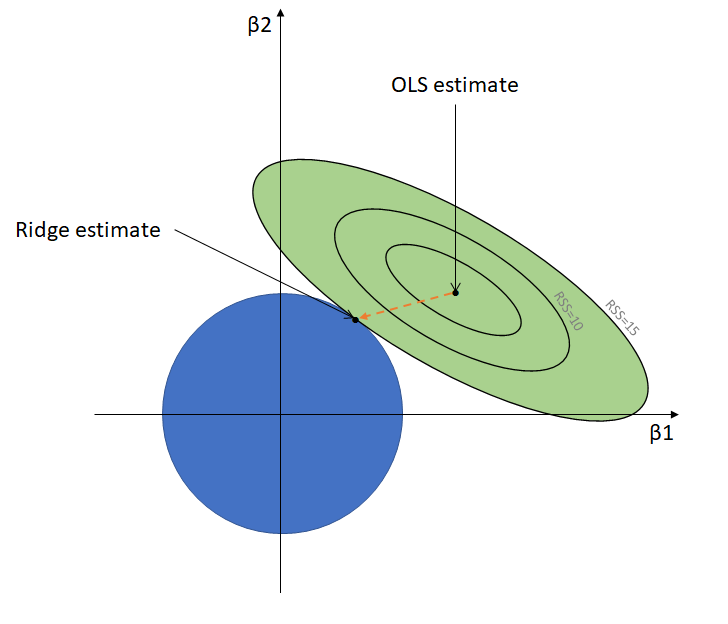

In [58]:
from sklearn.linear_model import Ridge # Ridge regression, toplam residue'ya bias ekleyerek overfitting önüne gecer

In [59]:
ridge_model = Ridge(alpha=1, random_state=60)   # alfayi denemek icin 1 aldik, birsebebi yok. ilerideen iyi alfayi da sececegiz.

In [60]:
ridge_model.fit(X_train_scaled, y_train)  # fit ettik modeli

Ridge(alpha=1, random_state=60)

In [62]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [63]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.985310,0.990272
mae,0.370054,0.378439
mse,0.381866,0.280583
rmse,0.617953,0.529701


In [64]:
pd.concat([ls, rs], axis=1)

,linear_train,linear_test,ridge_train,ridge_test
R2,0.997822,0.994462,0.985310,0.990272
mae,0.184884,0.296886,0.370054,0.378439
mse,0.056620,0.159737,0.381866,0.280583
rmse,0.237950,0.399671,0.617953,0.529701


## For Ridge Regression CV with alpha : 1 

In [65]:
model = Ridge(alpha=1, random_state=60)   # ridge'i de cv'ye soktum, skorunu buldum.. Saglam skoru bileyim diye..
scores = cross_validate(model, X_train_scaled, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [70]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.002992,0.002992,0.908338,-0.821892,-1.430944,-1.196221
2,0.003991,0.005983,0.975492,-0.507893,-0.849625,-0.921751
3,0.001995,0.001999,0.990054,-0.483181,-0.335530,-0.579249
4,0.001993,0.005980,0.922722,-0.664504,-1.707659,-1.306774
5,0.002988,0.000998,0.994536,-0.250779,-0.123693,-0.351700


In [71]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                             0.958228
test_neg_mean_absolute_error       -0.545650
test_neg_mean_squared_error        -0.889490
test_neg_root_mean_squared_error   -0.871139
dtype: float64

In [68]:
train_val(y_train, y_train_pred, y_test, y_pred, "ridge")

,ridge_train,ridge_test
R2,0.985310,0.990272
mae,0.370054,0.378439
mse,0.381866,0.280583
rmse,0.617953,0.529701


<AxesSubplot:>

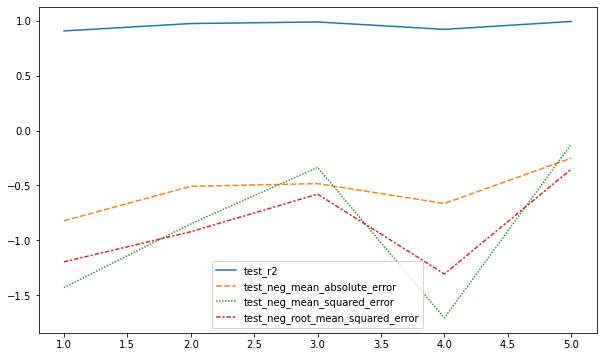

In [69]:
sns.lineplot(data = scores.iloc[:,2:])

In [72]:
ridge_model.coef_

array([ 3.62076836e+00,  7.26823527e-01,  1.43795986e-01, -1.10377333e+00,
        2.60470083e+00,  2.42393164e-01, -1.49465822e-01,  1.41426263e-01,
       -2.57531270e-01, -1.09173099e+00, -1.19214985e-01, -7.10432365e-01,
        1.34032869e+00,  2.09741018e-01,  1.36128642e-01, -4.78063914e-01,
        1.11592533e-01, -4.91881028e-02, -3.98852639e-02, -2.62881491e-01,
        1.84990602e-02, -1.86659733e-01, -5.41907854e-01, -2.22079268e-01,
       -7.44663466e-02,  7.60667542e-01, -6.60910562e-02,  3.34643787e-02,
        1.20077270e-01, -3.39716988e-01,  9.67192938e-02,  1.90300840e-02,
        3.98368228e-02,  4.26857630e-02,  5.26067666e-01,  6.00720708e-01,
        4.93780486e-01, -2.54506232e-01,  2.54219628e-01,  2.11459623e-01,
       -7.85479946e-01, -3.37117479e-01, -7.61583298e-03, -5.00126605e-02,
        5.38277613e-01, -1.98166952e-01, -6.83997445e-02,  1.64261479e-03,
       -8.90644304e-02,  3.77255324e-02,  1.22526874e-01, -2.51667933e-03,
        9.64886708e-03,  

In [77]:
rm_df = pd.DataFrame(ridge_model.coef_, columns = ["ridge_coef_1"]) # 55 feature'larin coefficient'lerini df haline cevirdik

In [78]:
pd.concat([lm_df,rm_df], axis = 1) # görüldügü gibi ridge'de coefficient'ler degisiti. 
#(coef, hangi feature'in daha önemli oldugunu gösterir)

,lm_coef,ridge_coef_1
0,16.411501,3.620768
1,-5.710979,0.726824
2,-0.709273,0.143796
3,-63.849813,-1.103773
4,17.225086,2.604701
5,-10.368231,0.242393
6,22.802900,-0.149466
7,9.637128,0.141426
8,7.137105,-0.257531
9,119.780974,-1.091731


## Choosing best alpha value with Cross-Validation

In [79]:
from sklearn.linear_model import RidgeCV # Ridge ve lasso icin ridgecv, digerleriicin gridsearch ile alfa bulunur

In [80]:
alpha_space = np.linspace(0.01, 1, 100)   # Burada önden bir bu araliga bakiyoruz, belki optimum deger buradadir diye Ama burada 1 yerine 10 da koyabiliriz.
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [81]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 5, scoring= "neg_root_mean_squared_error")

In [82]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [83]:
ridge_cv_model.alpha_ #Ridge(alpha=0.02)

0.01

In [84]:
#rmse for ridge with CV
ridge_cv_model.best_score_

-0.8342095253830408

In [85]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [86]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv") # rigde cv scores
rcs

,ridge_cv_train,ridge_cv_test
R2,0.994623,0.991802
mae,0.270860,0.362654
mse,0.139769,0.236450
rmse,0.373857,0.486262


In [87]:
pd.concat([ls, rs, rcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
R2,0.997822,0.994462,0.985310,0.990272,0.994623,0.991802
mae,0.184884,0.296886,0.370054,0.378439,0.270860,0.362654
mse,0.056620,0.159737,0.381866,0.280583,0.139769,0.236450
rmse,0.237950,0.399671,0.617953,0.529701,0.373857,0.486262


In [101]:
ridge_cv_model.coef_

array([  8.46974668,  -0.20464311,   0.99385883, -12.88153696,
         5.17965432,  -1.55090016,   2.3236348 ,  -0.73583567,
        -0.88642583,   4.77555904,  -4.44704588,  -0.88513031,
         0.39527948,  -0.27059616,   1.14367787,  -1.66595492,
         1.0546377 ,  -0.65085063,  -0.02413292,   5.17880885,
         5.96562837,   2.19320696,  -5.40742232,   4.22502143,
         0.20391632,   2.55082149,  -2.13665034,  -1.61921015,
         0.92002276,  -1.91601313,   0.68079873,   0.31252889,
         0.97823644,   0.45113635,  -3.61893822,  -3.05654856,
        -0.85735114,   5.42624019,  -3.04745147,   0.17314698,
        -5.19145096,   2.66040206,  -0.59338317,  -1.52408893,
         3.43758239,  -1.18466288,  -0.53755339,   2.20719021,
        -0.31478073,   0.44516369,  -0.06417121,   0.11250683,
         0.04257788,  -1.15676659,  -0.15410077])

In [102]:
rcm_df = pd.DataFrame(ridge_cv_model.coef_, columns=["ridge_cv_coef_0.02"])

In [171]:
# pd.concat([lm_df,rm_df, rcm_df], axis = 1)

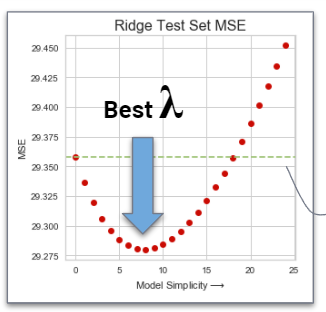

In [ ]:
# Ridge vasitasiyla multicollinetry ve overfitting ile mücadele ettik.

## <span style='color:red'> Lasso Regression</span> 

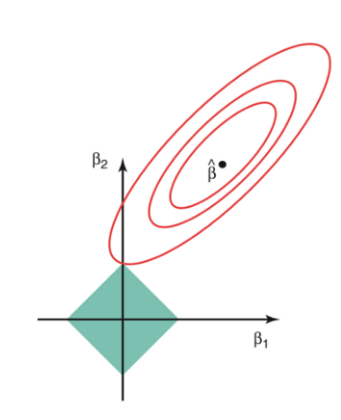

In [88]:
from sklearn.linear_model import Lasso, LassoCV

In [89]:
lasso_model = Lasso(alpha=1, random_state=60)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1, random_state=60)

In [90]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [91]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.916074,0.915717
mae,1.014731,1.237820
mse,2.181642,2.431032
rmse,1.477038,1.559177


In [92]:
pd.concat([ls, rs, rcs, lss], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
R2,0.997822,0.994462,0.985310,0.990272,0.994623,0.991802,0.916074,0.915717
mae,0.184884,0.296886,0.370054,0.378439,0.270860,0.362654,1.014731,1.237820
mse,0.056620,0.159737,0.381866,0.280583,0.139769,0.236450,2.181642,2.431032
rmse,0.237950,0.399671,0.617953,0.529701,0.373857,0.486262,1.477038,1.559177


## For Lasso CV with Default Alpha : 1

In [93]:
model = Lasso(alpha=1, random_state=60)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [94]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.002990,0.001996,0.912300,-0.778179,-1.369091,-1.170082
2,0.001996,0.003002,0.896792,-1.357247,-3.577885,-1.891530
3,0.001996,0.001994,0.933778,-1.167223,-2.234086,-1.494686
4,0.002992,0.001994,0.860434,-1.054694,-3.084061,-1.756149
5,0.001996,0.003004,0.954543,-0.816052,-1.028966,-1.014380


In [95]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                             0.911569
test_neg_mean_absolute_error       -1.034679
test_neg_mean_squared_error        -2.258818
test_neg_root_mean_squared_error   -1.465365
dtype: float64

In [96]:
train_val(y_train, y_train_pred, y_test, y_pred, "lasso")

,lasso_train,lasso_test
R2,0.916074,0.915717
mae,1.014731,1.237820
mse,2.181642,2.431032
rmse,1.477038,1.559177


<AxesSubplot:>

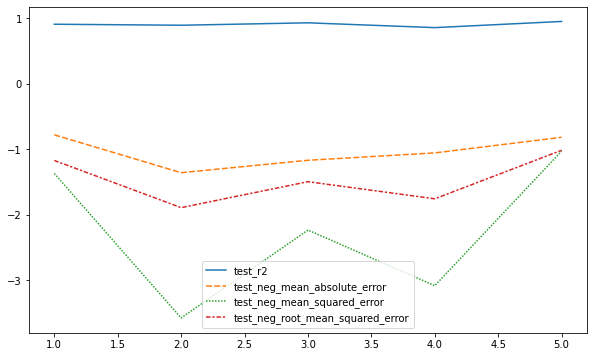

In [97]:
sns.lineplot(data = scores.iloc[:,2:])

In [98]:
lasso_model.coef_

array([0.72687963, 0.        , 0.        , 0.        , 3.43091272,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [99]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])

In [103]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.02,lasso_coef_1
0,16.411501,3.620768,8.469747,0.726880
1,-5.710979,0.726824,-0.204643,0.000000
2,-0.709273,0.143796,0.993859,0.000000
3,-63.849813,-1.103773,-12.881537,0.000000
4,17.225086,2.604701,5.179654,3.430913
5,-10.368231,0.242393,-1.550900,0.000000
6,22.802900,-0.149466,2.323635,0.000000
7,9.637128,0.141426,-0.735836,0.000000
8,7.137105,-0.257531,-0.886426,0.000000
9,119.780974,-1.091731,4.775559,0.000000


### Choosing best alpha value with Cross-Validation

In [104]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5, max_iter=100000, random_state=60) #cv bize daha gercek degerleri gösterir

In [105]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, max_iter=100000, random_state=60)

In [107]:
lasso_cv_model.alpha_   # iyi alfa 0.01 imis

0.01

In [108]:
np.where(alpha_space[::-1]==lasso_cv_model.alpha_)

(array([99], dtype=int64),)

In [109]:
alpha_space[::-1]

array([1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9 ,
       0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79,
       0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.68,
       0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58, 0.57,
       0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47, 0.46,
       0.45, 0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36, 0.35,
       0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25, 0.24,
       0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13,
       0.12, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02,
       0.01])

In [111]:
#mse score for CV
lasso_cv_model.mse_path_[99].mean()

0.59006753616321

In [112]:
y_pred = lasso_cv_model.predict(X_test_scaled)   #Lasso(alpha =0.01)
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [113]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

,lasso_cv_train,lasso_cv_test
R2,0.986187,0.993950
mae,0.358513,0.324586
mse,0.359068,0.174506
rmse,0.599223,0.417739


In [114]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
R2,0.997822,0.994462,0.985310,0.990272,0.994623,0.991802,0.916074,0.915717,0.986187,0.993950
mae,0.184884,0.296886,0.370054,0.378439,0.270860,0.362654,1.014731,1.237820,0.358513,0.324586
mse,0.056620,0.159737,0.381866,0.280583,0.139769,0.236450,2.181642,2.431032,0.359068,0.174506
rmse,0.237950,0.399671,0.617953,0.529701,0.373857,0.486262,1.477038,1.559177,0.599223,0.417739


In [115]:
lasso_cv_model.coef_  #Burada 10 feature ileisi götürürüm diyor. alfa =1 iken 2 demisti.

array([ 4.9204062 ,  0.35426991,  0.07087085, -3.98477491,  3.63271644,
       -0.        ,  0.        ,  0.10568378,  0.        , -0.        ,
       -0.        , -0.03646636,  0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.73140651,
       -0.        ,  0.        , -0.00706347, -0.        ,  0.        ,
       -0.        , -0.17873569, -0.        ,  0.        ,  0.11573956,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ])

In [129]:
lcm_df = pd.DataFrame(lasso_cv_model.coef_, columns = ["lasso_cv_coef_0.01"])

In [83]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.02,lasso_coef_1,lasso_cv_coef_0.01
0,13.942084,3.428822,6.383047,0.696016,4.270214
1,-3.147845,0.689086,0.709275,0.000000,0.180374
2,0.622117,0.170305,0.478838,0.000000,0.139659
3,-58.348614,-0.910850,-8.015483,0.000000,-3.146055
4,17.227695,2.723077,3.997813,3.490946,4.153400
5,-3.875031,0.112909,-0.714940,0.000000,-0.000000
6,14.688014,-0.404686,-0.509197,0.000000,0.000000
7,0.835494,0.287950,0.727012,0.000000,0.062497
8,-2.765824,-0.091937,-0.883005,0.000000,0.000000
9,115.503087,-1.014535,2.244645,0.000000,-0.000000


## <span style='color:red'> Elastic net</span> 

In [116]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [118]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=60) # l1_ratio: 1: Lasso or 0:Ridge
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=1, random_state=60)

In [119]:
y_pred = elastic_model.predict(X_test_scaled)  # l1 ratio ve alfayi kafadan sectik..deniyoruz..
y_train_pred = elastic_model.predict(X_train_scaled)

In [120]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

,elastic_train,elastic_test
R2,0.894819,0.890866
mae,1.220984,1.484246
mse,2.734176,3.147819
rmse,1.653534,1.774209


In [121]:
pd.concat([ls,rs, rcs, lss, lcs, es], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
R2,0.997822,0.994462,0.985310,0.990272,0.994623,0.991802,0.916074,0.915717,0.986187,0.993950,0.894819,0.890866
mae,0.184884,0.296886,0.370054,0.378439,0.270860,0.362654,1.014731,1.237820,0.358513,0.324586,1.220984,1.484246
mse,0.056620,0.159737,0.381866,0.280583,0.139769,0.236450,2.181642,2.431032,0.359068,0.174506,2.734176,3.147819
rmse,0.237950,0.399671,0.617953,0.529701,0.373857,0.486262,1.477038,1.559177,0.599223,0.417739,1.653534,1.774209


## For Elastic_net CV with Default alpha = 1 and l1_ratio=0.5

In [122]:
model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=60)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [123]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.870225,-1.064394,-2.025927,-1.423351
2,0.882157,-1.543379,-4.085239,-2.021198
3,0.929715,-1.154965,-2.371150,-1.539854
4,0.801992,-1.419644,-4.375477,-2.091764
5,0.930769,-1.092054,-1.567127,-1.251850


In [124]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                             0.882971
test_neg_mean_absolute_error       -1.254887
test_neg_mean_squared_error        -2.884984
test_neg_root_mean_squared_error   -1.665603
dtype: float64

In [125]:
train_val(y_train, y_train_pred, y_test, y_pred, "elastic")

,elastic_train,elastic_test
R2,0.894819,0.890866
mae,1.220984,1.484246
mse,2.734176,3.147819
rmse,1.653534,1.774209


In [126]:
elastic_model.coef_

array([0.80154726, 0.12490892, 0.        , 0.30348388, 0.92759179,
       0.04601122, 0.        , 0.        , 0.        , 0.        ,
       0.5218754 , 0.        , 0.57920137, 0.12876799, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.21755832, 0.        , 0.28943072, 0.        , 0.        ,
       0.32933515, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.04806234, 0.        , 0.        ,
       0.10005189, 0.        , 0.        , 0.        , 0.14523106,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [127]:
em_df = pd.DataFrame(elastic_model.coef_, columns=["elastic_coef_(alp:1, l1:0.5)"])

In [130]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.02,lasso_coef_1,lasso_cv_coef_0.01,"elastic_coef_(alp:1, l1:0.5)"
0,16.411501,3.620768,8.469747,0.726880,4.920406,0.801547
1,-5.710979,0.726824,-0.204643,0.000000,0.354270,0.124909
2,-0.709273,0.143796,0.993859,0.000000,0.070871,0.000000
3,-63.849813,-1.103773,-12.881537,0.000000,-3.984775,0.303484
4,17.225086,2.604701,5.179654,3.430913,3.632716,0.927592
5,-10.368231,0.242393,-1.550900,0.000000,-0.000000,0.046011
6,22.802900,-0.149466,2.323635,0.000000,0.000000,0.000000
7,9.637128,0.141426,-0.735836,0.000000,0.105684,0.000000
8,7.137105,-0.257531,-0.886426,0.000000,0.000000,0.000000
9,119.780974,-1.091731,4.775559,0.000000,-0.000000,0.000000


### Choosing best alpha and l1_ratio values with Cross-Validation

In [132]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 5, 
                                max_iter = 100000,random_state=60) # l1ratio muhtemelleri kafadan yazdik, yine aralikli verebiliriz..

In [133]:
elastic_cv_model.fit(X_train_scaled, y_train)

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000,
             random_state=60)

In [134]:
elastic_cv_model.alpha_

0.01

In [135]:
elastic_cv_model.l1_ratio_

1.0

In [172]:
#mse score for CV
# elastic_cv_model.mse_path_[5][-1].mean()

In [136]:
y_pred = elastic_cv_model.predict(X_test_scaled)
y_train_pred = elastic_cv_model.predict(X_train_scaled)

In [137]:
ecs = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_cv")
ecs

,elastic_cv_train,elastic_cv_test
R2,0.986187,0.993950
mae,0.358513,0.324586
mse,0.359068,0.174506
rmse,0.599223,0.417739


In [138]:
pd.concat([ls,rs, rcs, lss, lcs, es, ecs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test
R2,0.997822,0.994462,0.985310,0.990272,0.994623,0.991802,0.916074,0.915717,0.986187,0.993950,0.894819,0.890866,0.986187,0.993950
mae,0.184884,0.296886,0.370054,0.378439,0.270860,0.362654,1.014731,1.237820,0.358513,0.324586,1.220984,1.484246,0.358513,0.324586
mse,0.056620,0.159737,0.381866,0.280583,0.139769,0.236450,2.181642,2.431032,0.359068,0.174506,2.734176,3.147819,0.359068,0.174506
rmse,0.237950,0.399671,0.617953,0.529701,0.373857,0.486262,1.477038,1.559177,0.599223,0.417739,1.653534,1.774209,0.599223,0.417739


In [139]:
elastic_cv_model.coef_

array([ 4.9204062 ,  0.35426991,  0.07087085, -3.98477491,  3.63271644,
       -0.        ,  0.        ,  0.10568378,  0.        , -0.        ,
       -0.        , -0.03646636,  0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.73140651,
       -0.        ,  0.        , -0.00706347, -0.        ,  0.        ,
       -0.        , -0.17873569, -0.        ,  0.        ,  0.11573956,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ])

In [140]:
ecm_df = pd.DataFrame(elastic_cv_model.coef_, columns=["elastic_coef_(alp:0.01, l1:1)"])

In [141]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df, ecm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.02,lasso_coef_1,lasso_cv_coef_0.01,"elastic_coef_(alp:1, l1:0.5)","elastic_coef_(alp:0.01, l1:1)"
0,16.411501,3.620768,8.469747,0.726880,4.920406,0.801547,4.920406
1,-5.710979,0.726824,-0.204643,0.000000,0.354270,0.124909,0.354270
2,-0.709273,0.143796,0.993859,0.000000,0.070871,0.000000,0.070871
3,-63.849813,-1.103773,-12.881537,0.000000,-3.984775,0.303484,-3.984775
4,17.225086,2.604701,5.179654,3.430913,3.632716,0.927592,3.632716
5,-10.368231,0.242393,-1.550900,0.000000,-0.000000,0.046011,-0.000000
6,22.802900,-0.149466,2.323635,0.000000,0.000000,0.000000,0.000000
7,9.637128,0.141426,-0.735836,0.000000,0.105684,0.000000,0.105684
8,7.137105,-0.257531,-0.886426,0.000000,0.000000,0.000000,0.000000
9,119.780974,-1.091731,4.775559,0.000000,-0.000000,0.000000,-0.000000


## <span style='color:red'> Grid Search</span> 

In [144]:
from sklearn.model_selection import GridSearchCV

In [145]:
elastic_model = ElasticNet(max_iter=10000, random_state=60) # Biz burada elesticNet kulandik, yarin XGboost filan da olabilir

In [146]:
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],   # alfa icin istedigimiz linspaceli aralik bile verebiliriz.  
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}   # Izgara gibi kombinasyon halinde uyguluyor.

In [147]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =5, verbose =2)  # verbose da sonuclari her 2 iterasyonda bir göster demek.

In [148]:
grid_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.7; total time=   0.0s
[CV] END ...........................alpha=0.01,

[CV] END ............................alpha=0.5, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.9; total time=   0.0s
[CV] END ...........................alpha=0.5, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=0.5, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=0.5, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=0.5, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=0.5, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=0.5, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=0.5, l1_ratio=0.99; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000, random_state=60),
             param_grid={'alpha': [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [149]:
grid_model.best_params_

{'alpha': 0.01, 'l1_ratio': 1}

In [113]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.030683,0.012300,0.001315,0.000409,0.01,0.1,"{'alpha': 0.01, 'l1_ratio': 0.1}",-0.586201,-0.693806,-1.184123,-0.491352,-0.490280,-0.689152,0.258570,13
1,0.008148,0.002968,0.001707,0.000894,0.01,0.5,"{'alpha': 0.01, 'l1_ratio': 0.5}",-0.553277,-0.537915,-1.172816,-0.488299,-0.493055,-0.649072,0.263070,10
2,0.021137,0.012190,0.001379,0.000834,0.01,0.7,"{'alpha': 0.01, 'l1_ratio': 0.7}",-0.529432,-0.527849,-1.157311,-0.480464,-0.500409,-0.639093,0.259749,9
3,0.029668,0.013644,0.005314,0.008847,0.01,0.9,"{'alpha': 0.01, 'l1_ratio': 0.9}",-0.490240,-0.504487,-1.120156,-0.446524,-0.484072,-0.609096,0.256247,6
4,0.025489,0.008320,0.002570,0.001822,0.01,0.95,"{'alpha': 0.01, 'l1_ratio': 0.95}",-0.470398,-0.497256,-1.110933,-0.437316,-0.481998,-0.599580,0.256435,3
5,0.011600,0.003193,0.000833,0.000278,0.01,0.99,"{'alpha': 0.01, 'l1_ratio': 0.99}",-0.455118,-0.493277,-1.098376,-0.430248,-0.484677,-0.592339,0.254000,2
6,0.008165,0.001748,0.001482,0.000676,0.01,1,"{'alpha': 0.01, 'l1_ratio': 1}",-0.451422,-0.492426,-1.094927,-0.428596,-0.486989,-0.590872,0.253114,1
7,0.016527,0.004957,0.001088,0.000578,0.012,0.1,"{'alpha': 0.012, 'l1_ratio': 0.1}",-0.606883,-0.654207,-1.214541,-0.509165,-0.495180,-0.695995,0.266011,14
8,0.010062,0.002475,0.001943,0.002199,0.012,0.5,"{'alpha': 0.012, 'l1_ratio': 0.5}",-0.573940,-0.553763,-1.195471,-0.509639,-0.498213,-0.666205,0.266088,12
9,0.009193,0.002494,0.002554,0.002241,0.012,0.7,"{'alpha': 0.012, 'l1_ratio': 0.7}",-0.552026,-0.551934,-1.180732,-0.504933,-0.506986,-0.659322,0.261517,11


In [114]:
grid_model.best_index_

6

In [115]:
grid_model.best_score_

-0.5908719878682445

## Using Best Hyper Parameters From GridSearch

In [150]:
y_pred = grid_model.predict(X_test_scaled)
y_train_pred = grid_model.predict(X_train_scaled)

In [151]:
train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")

,GridSearch_train,GridSearch_test
R2,0.986187,0.993950
mae,0.358513,0.324586
mse,0.359068,0.174506
rmse,0.599223,0.417739


## Final Model

In [154]:
final_scaler = StandardScaler()
X_scaled = final_scaler.fit_transform(poly_features)

In [155]:
final_model = Lasso(alpha=0.01) #lasso_cv_model # Bunu alfayi bir buldugu ucun kani olduk.

In [156]:
final_model.fit(X_scaled, y)

Lasso(alpha=0.01)

## Feature importances with Ridge

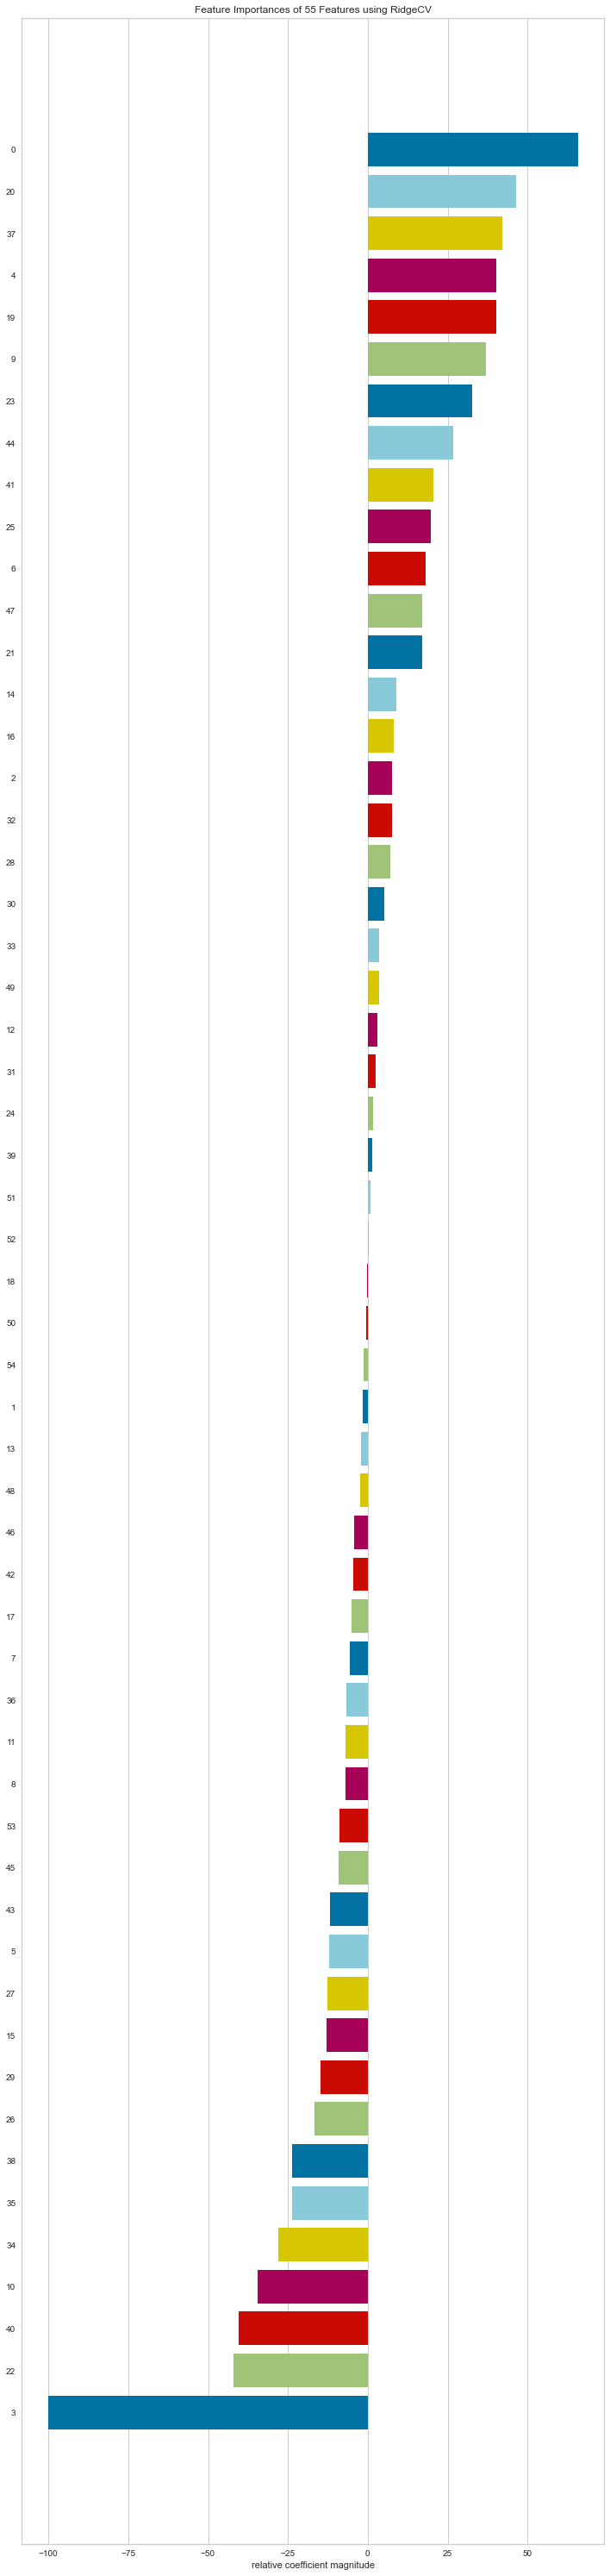

<AxesSubplot:title={'center':'Feature Importances of 55 Features using RidgeCV'}, xlabel='relative coefficient magnitude'>

In [157]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz    # Radviz'i grafik büyüklügü icin kullaniyoruz.

viz = FeatureImportances(ridge_cv_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()

In [ ]:
# En etkili feature 0 numarali olan, sonraki 20 numarali olan...Grafige göre..

## Feature importances with Lasso

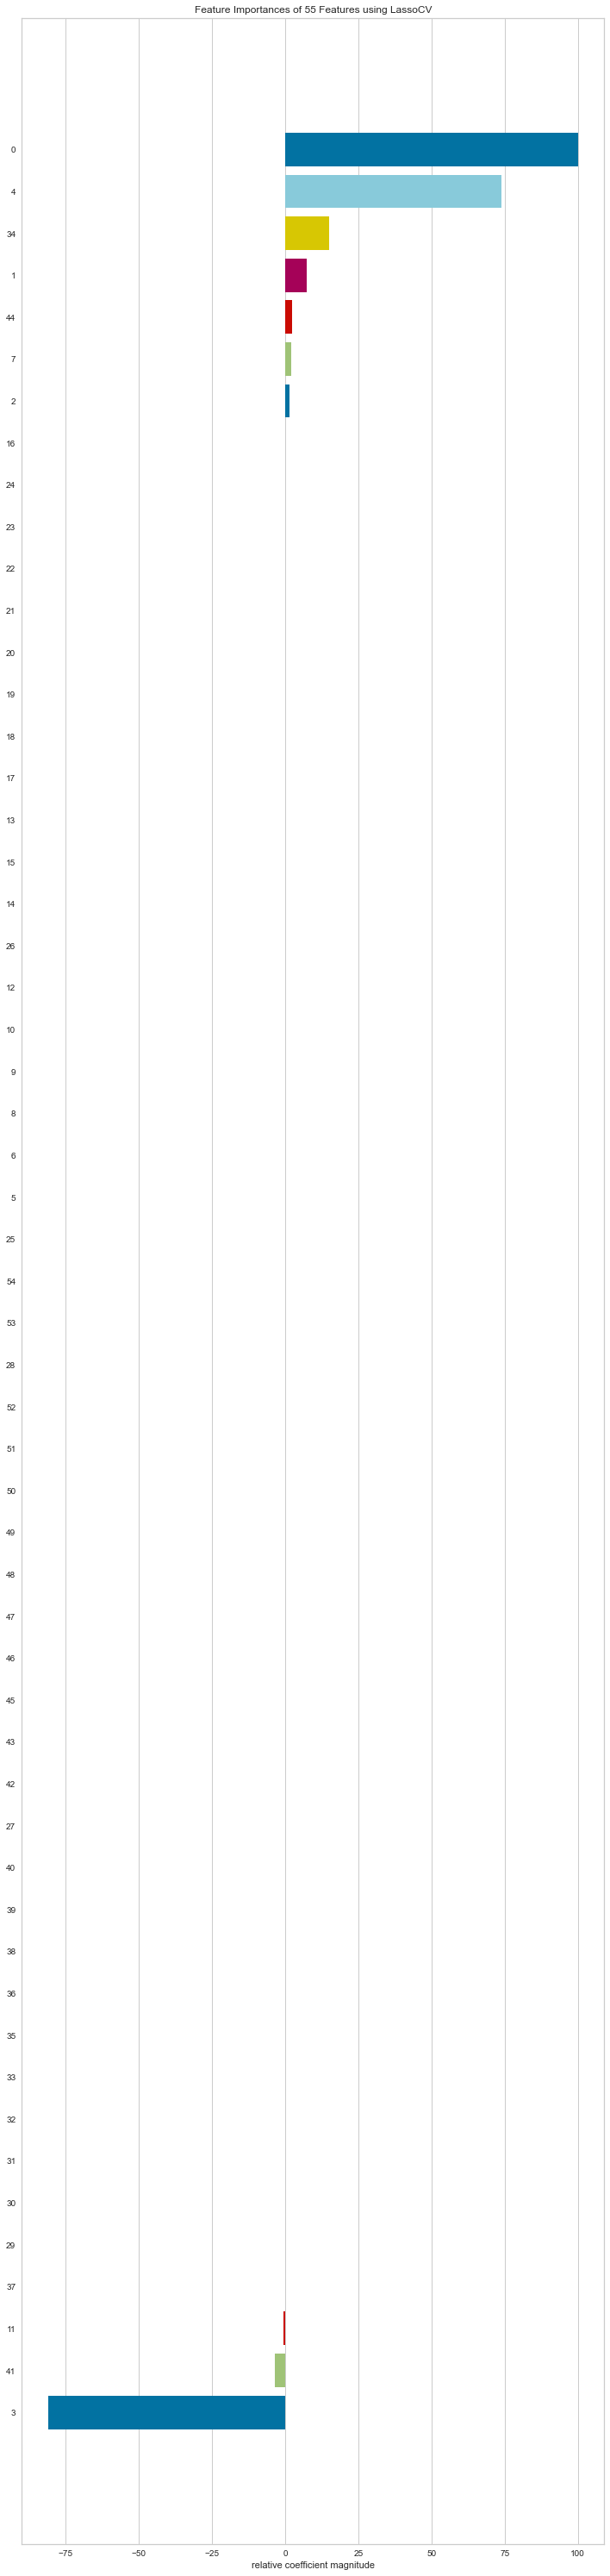

<AxesSubplot:title={'center':'Feature Importances of 55 Features using LassoCV'}, xlabel='relative coefficient magnitude'>

In [158]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(lasso_cv_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()

In [ ]:
# Lasso da zaten belli feature'lari silmis..